In [ ]:
dir_data = ["../ts.jpeg",
            "../Camera_1.jpg"]

In [ ]:
from keras.preprocessing.image import  img_to_array, load_img

target_size = (256,256)
# Get images
Ximg = []
for filename in dir_data:
    Ximg.append(load_img(filename,target_size=target_size))
print(Ximg[0])

<PIL.Image.Image image mode=RGB size=256x256 at 0x7F010016D4D0>


In [ ]:
import numpy as np
Xsub_rgb = []
for img in Ximg:
    Xsub_rgb.append(img_to_array(img))

print(Xsub_rgb[0].shape)
print(Xsub_rgb[0])

## convert the entire list to numpy array
Xsub_rgb = np.array(Xsub_rgb)

(256, 256, 3)
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
## Extrat the first few example images
Nsample = Xsub_rgb.shape[0]

def plotMinMax(Xsub_rgb,labels=["R","G","B"]):
    print("______________________________")
    for i, lab in enumerate(labels):
        mi = np.min(Xsub_rgb[:,:,:,i])
        ma = np.max(Xsub_rgb[:,:,:,i])
        print("{} : MIN={:8.4f}, MAX={:8.4f}".format(lab,mi,ma))

plotMinMax(Xsub_rgb,labels=["R","G","B"])

______________________________
R : MIN=  0.0000, MAX=255.0000
G : MIN=  0.0000, MAX=255.0000
B : MIN=  0.0000, MAX=255.0000


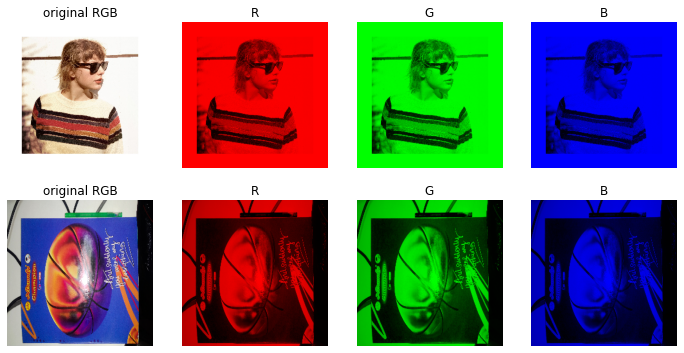

In [ ]:
from copy import copy
import matplotlib.pyplot as plt

count = 1
fig = plt.figure(figsize=(12,3*Nsample))
for rgb in Xsub_rgb:
    ## This section plot the original rgb
    ax = fig.add_subplot(Nsample,4,count)
    ax.imshow(rgb/255.0); ax.axis("off")
    ax.set_title("original RGB")
    count += 1

    for i, lab in enumerate(["R","G","B"]):
        crgb = np.zeros(rgb.shape)
        crgb[:,:,i] = rgb[:,:,0]
        ax = fig.add_subplot(Nsample,4,count)
        ax.imshow(crgb/255.0); ax.axis("off")
        ax.set_title(lab)
        count += 1

plt.show()

In [ ]:
Xsub_rgb01 = Xsub_rgb/255.0


In [ ]:
from skimage.color import rgb2lab, lab2rgb
Xsub_lab = rgb2lab(Xsub_rgb01)
plotMinMax(Xsub_lab,labels=["L","A","B"])

______________________________
L : MIN=  0.0000, MAX=100.0000
A : MIN=-59.2536, MAX= 75.4239
B : MIN=-69.9051, MAX= 80.1606


In [ ]:
# lab2rgb has to have a dimension (-,-,3)
Xsub_lab_rgb = np.zeros( Xsub_lab.shape)
for i in range(Xsub_lab.shape[0]):
    Xsub_lab_rgb[i] = lab2rgb(Xsub_lab[i])
plotMinMax(Xsub_lab_rgb.reshape((1,) + Xsub_lab_rgb.shape),labels=["R","G","B"])

______________________________
R : MIN=  0.0392, MAX=  1.0000
G : MIN=  0.0392, MAX=  1.0000
B : MIN=  0.0314, MAX=  1.0000


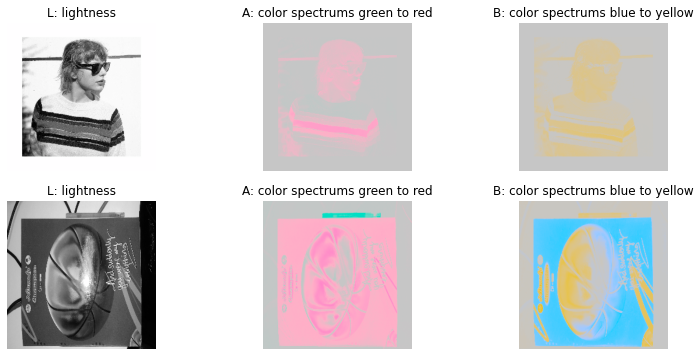

In [ ]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

count = 1
fig = plt.figure(figsize=(13,3*Nsample))
for lab in Xsub_lab:

    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,0)
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("L: lightness")
    count += 1

    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,1)
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("A: color spectrums green to red")
    count += 1

    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,2)
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("B: color spectrums blue to yellow")
    count += 1
plt.show()

In [ ]:
def rgb2lab ( inputColor ) :

   num = 0
   RGB = [0, 0, 0]

   for value in inputColor :
       value = float(value) / 255

       if value > 0.04045 :
           value = ( ( value + 0.055 ) / 1.055 ) ** 2.4
       else :
           value = value / 12.92

       RGB[num] = value * 100
       num = num + 1

   XYZ = [0, 0, 0,]

   X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
   Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
   Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
   XYZ[ 0 ] = round( X, 4 )
   XYZ[ 1 ] = round( Y, 4 )
   XYZ[ 2 ] = round( Z, 4 )

   XYZ[ 0 ] = float( XYZ[ 0 ] ) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
   XYZ[ 1 ] = float( XYZ[ 1 ] ) / 100.0          # ref_Y = 100.000
   XYZ[ 2 ] = float( XYZ[ 2 ] ) / 108.883        # ref_Z = 108.883

   num = 0
   for value in XYZ :

       if value > 0.008856 :
           value = value ** ( 0.3333333333333333 )
       else :
           value = ( 7.787 * value ) + ( 16 / 116 )

       XYZ[num] = value
       num = num + 1

   Lab = [0, 0, 0]

   L = ( 116 * XYZ[ 1 ] ) - 16
   a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
   b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

   Lab [ 0 ] = round( L, 4 )
   Lab [ 1 ] = round( a, 4 )
   Lab [ 2 ] = round( b, 4 )

   return Lab
rgb2lab([100,100,100])

[42.3747, 0.0028, -0.0052]